# Load the dataset

In [1]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#read the dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/S7 PROJECT/voice_features.csv')
print(df.head())

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1   spread2  \

#Properties of dataset

In [3]:
#dataset properties
print(df.shape)

(195, 23)


In [4]:
#dataset properties
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  RPDE              195 non-null    float64
 1

In [5]:
#dataset properties
print(df.describe())

       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000

#**Without Pre-processing data, model construction**

#Min and Max values in dataset

In [6]:
# Find min and max values
min_values = df.min()
max_values = df.max()

print("Minimum values:\n", min_values)
print("\nMaximum values:\n", max_values)

Minimum values:
 MDVP:Fo(Hz)          88.333000
MDVP:Fhi(Hz)        102.145000
MDVP:Flo(Hz)         65.476000
MDVP:Jitter(%)        0.001680
MDVP:Jitter(Abs)      0.000007
MDVP:RAP              0.000680
MDVP:PPQ              0.000920
Jitter:DDP            0.002040
MDVP:Shimmer          0.009540
MDVP:Shimmer(dB)      0.085000
Shimmer:APQ3          0.004550
Shimmer:APQ5          0.005700
MDVP:APQ              0.007190
Shimmer:DDA           0.013640
NHR                   0.000650
HNR                   8.441000
RPDE                  0.256570
DFA                   0.574282
spread1              -7.964984
spread2               0.006274
D2                    1.423287
PPE                   0.044539
class                 0.000000
dtype: float64

Maximum values:
 MDVP:Fo(Hz)         260.105000
MDVP:Fhi(Hz)        592.030000
MDVP:Flo(Hz)        239.170000
MDVP:Jitter(%)        0.033160
MDVP:Jitter(Abs)      0.000260
MDVP:RAP              0.021440
MDVP:PPQ              0.019580
Jitter:DDP          

In [7]:
# Find the minimum and maximum values in the entire dataset
minimum = df.min().min()
maximum = df.max().max()

print("Minimum value in the dataset:", minimum)
print("Maximum value in the dataset:", maximum)

Minimum value in the dataset: -7.964984
Maximum value in the dataset: 592.03


#Splitting of features and target variable

In [8]:
# Separate features and target variable
x = df.drop('class', axis=1)
Y = df['class']

#Target variable

In [9]:
#count of categerical value in class label
class_counts = Y.value_counts()
print(class_counts)

class
1    147
0     48
Name: count, dtype: int64


#Visualization

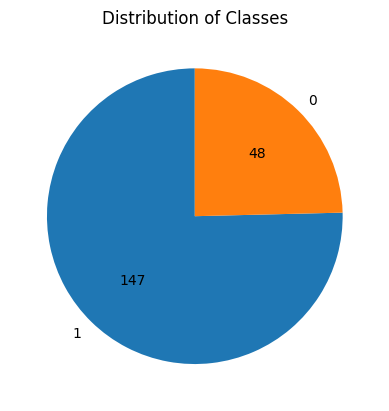

In [10]:
#pie chart to visualize
import matplotlib.pyplot as plt

# Create a pie chart
labels = [1,0]
sizes = [Y.value_counts()[1],Y.value_counts()[0]]

# Define a custom autopct function
def absolute_value(val):
    total = sum(sizes)
    absolute = int(round(val/100.*total))
    return f'{absolute}'

# Create a pie chart
plt.pie(sizes, labels=labels, autopct=absolute_value,startangle=90)

plt.title('Distribution of Classes')
plt.show()

#Training and testing dataset splitting

In [11]:
#split the dataset into training and testing
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

x_train shape: (136, 22)
x_test shape: (59, 22)
Y_train shape: (136,)
Y_test shape: (59,)


#Construct the AlexNet model

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Model definition
def alexnet_1d(input_shape):
    model = models.Sequential()
    model.add(layers.Conv1D(filters=96, kernel_size=11, strides=4, padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(pool_size=2, strides=2))
    model.add(layers.Conv1D(filters=256, kernel_size=5, padding='same', activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2, strides=2))
    model.add(layers.Conv1D(filters=384, kernel_size=3, padding='same', activation='relu'))
    model.add(layers.Conv1D(filters=384, kernel_size=3, padding='same', activation='relu'))
    model.add(layers.Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(units=4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=1, activation='sigmoid'))
    return model

# Initialize and compile the model
model = alexnet_1d(input_shape=(x_train.shape[1], 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 6, 96)               │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 3, 96)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 3, 256)              │         123,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1, 384)              │         295,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 1, 384)              │         442,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 1, 256)              │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 256)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       1,052,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,995,585 (72.46 MB)

 Trainable params: 18,995,585 (72.46 MB)

 Non-trainable params: 0 (0.00 B)

#Training the model

In [13]:
# train the model

# Reshape the input data for the 1D AlexNet
x_train_reshaped = x_train.values.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_reshaped = x_test.values.reshape(x_test.shape[0], x_test.shape[1], 1)

# Train the model
history = model.fit(x_train_reshaped, Y_train, epochs=10, batch_size=8, validation_data=(x_test_reshaped, Y_test))

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 503ms/step - accuracy: 0.6089 - loss: 0.7592 - val_accuracy: 0.7458 - val_loss: 0.7920
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 371ms/step - accuracy: 0.7412 - loss: 0.6615 - val_accuracy: 0.7458 - val_loss: 0.5994
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 354ms/step - accuracy: 0.7571 - loss: 0.5722 - val_accuracy: 0.7458 - val_loss: 0.5631
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 464ms/step - accuracy: 0.6996 - loss: 0.6292 - val_accuracy: 0.7458 - val_loss: 0.5589
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 386ms/step - accuracy: 0.7853 - loss: 0.5369 - val_accuracy: 0.7458 - val_loss: 0.5477
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 350ms/step - accuracy: 0.7521 - loss: 0.5553 - val_accuracy: 0.7458 - val_loss: 0.5481
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 406ms/step - accuracy: 0.7751 - loss: 0.5209 - val_accuracy: 0.4068 - val_loss: 0.9587
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 473ms/step - accuracy: 0.6330 - loss: 0.6978 - val_accura

#Accuracy and Loss curve

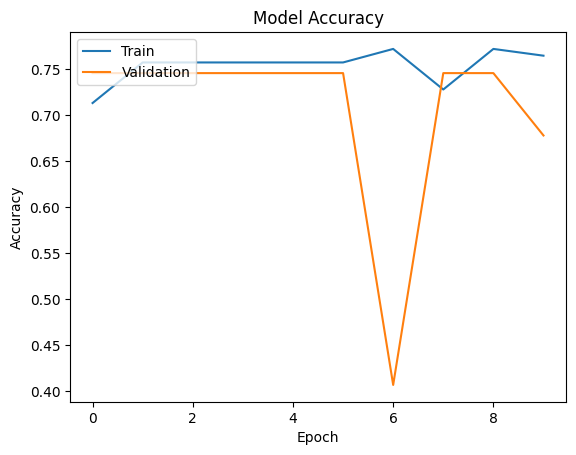

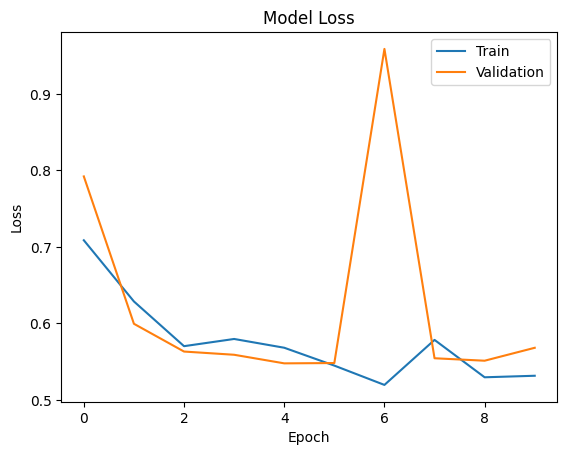

In [14]:
#generate accuracy and loss curve

import matplotlib.pyplot as plt
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#Calculation of metrics

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, cohen_kappa_score

# Predict on the test set
Y_pred = model.predict(x_test_reshaped)
Y_pred_binary = (Y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate metrics
accuracy = accuracy_score(Y_test, Y_pred_binary)
precision = precision_score(Y_test, Y_pred_binary)
recall = recall_score(Y_test, Y_pred_binary)
f1 = f1_score(Y_test, Y_pred_binary)
kappa = cohen_kappa_score(Y_test, Y_pred_binary)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_binary).ravel()
specificity = tn / (tn + fp)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1)
print("Kappa Constant:", kappa)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Accuracy: 0.6779661016949152
Precision: 0.7272727272727273
Recall: 0.9090909090909091
Specificity: 0.0
F1 Score: 0.8080808080808081
Kappa Constant: -0.11988011988012004


#ROC curve

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


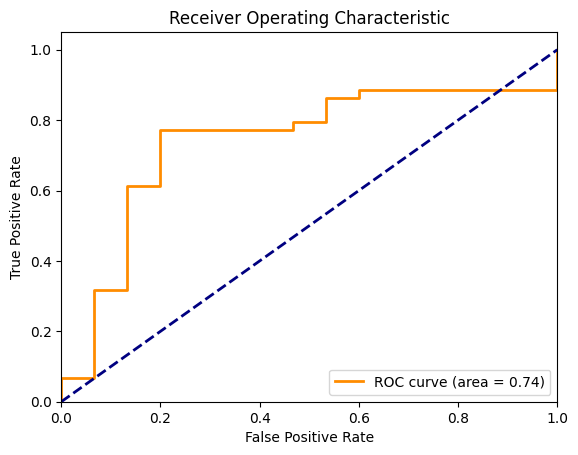

In [16]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
Y_pred_proba = model.predict(x_test_reshaped)[:, 0]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#**Pre-processed data model construction**

#Splitting the dataset into features and target

In [17]:
# Separate features and target variable
X = df.drop('class', axis=1)
y = df['class']

#Normalizing the features and target variables

In [18]:
#normalize the values in X using z-score
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform them
X_normalized = scaler.fit_transform(X)

# Convert the normalized array back to a DataFrame (optional)
X = pd.DataFrame(X_normalized, columns=X.columns)

print(X.head())

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0    -0.829300     -0.436165     -0.952037        0.334914          0.749759   
1    -0.770972     -0.530974     -0.057721        0.715418          1.037674   
2    -0.909476     -0.723168     -0.109875        0.884991          1.325589   
3    -0.909622     -0.649092     -0.114229        0.775389          1.325589   
4    -0.925657     -0.606245     -0.130608        1.368893          1.901418   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0  0.132963  0.760800    0.131755      0.745985          0.739536  ...   
1  0.453892  1.276809    0.452684      1.681731          1.768464  ...   
2  0.720770  1.585687    0.721813      1.202693          1.027636  ...   
3  0.578885  1.284076    0.577677      1.340396          1.207698  ...   
4  1.095750  2.047187    1.096793      1.836448          1.552389  ...   

   MDVP:APQ  Shimmer:DDA       NHR       HNR      RPDE       DFA   spread1

#Checking the range of values

In [19]:
# Find the maximum and minimum values in the entire dataset
maximum = X.max().max()
minimum = X.min().min()

print("Maximum value in the normalized dataset:", maximum)
print("Minimum value in the normalized dataset:", minimum)

Maximum value in the normalized dataset: 7.192738112120731
Minimum value in the normalized dataset: -3.0457071356137835


#Balancing the target values

In [20]:
#balance the values in y using smot

!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the dataset
X, y = smote.fit_resample(X, y)

In [21]:
#count of categerical value in class label
class_counts = y.value_counts()
print(class_counts)

class
1    147
0    147
Name: count, dtype: int64


In [22]:
#dataset properties
print(X.shape)

(294, 22)


#Visualization

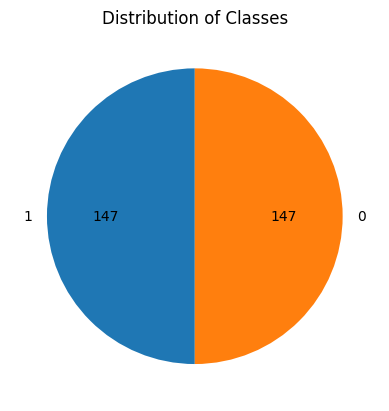

In [23]:
#pie chart to visualize
import matplotlib.pyplot as plt

# Create a pie chart
labels = [1,0]
sizes = [y.value_counts()[1],y.value_counts()[0]]

# Define a custom autopct function
def absolute_value(val):
    total = sum(sizes)
    absolute = int(round(val/100.*total))
    return f'{absolute}'

# Create a pie chart
plt.pie(sizes, labels=labels, autopct=absolute_value,startangle=90)

plt.title('Distribution of Classes')
plt.show()

#Training and testing dataset split

In [24]:
#split the dataset into training and testing
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (205, 22)
X_test shape: (89, 22)
y_train shape: (205,)
y_test shape: (89,)


#Construct the AlexNet model

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Model definition
def alexnet_1d(input_shape):
    model = models.Sequential()
    model.add(layers.Conv1D(filters=96, kernel_size=11, strides=4, padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(pool_size=2, strides=2))
    model.add(layers.Conv1D(filters=256, kernel_size=5, padding='same', activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2, strides=2))
    model.add(layers.Conv1D(filters=384, kernel_size=3, padding='same', activation='relu'))
    model.add(layers.Conv1D(filters=384, kernel_size=3, padding='same', activation='relu'))
    model.add(layers.Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(units=4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=1, activation='sigmoid'))
    return model

# Initialize and compile the model
model = alexnet_1d(input_shape=(X_train.shape[1], 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)                    │ (None, 6, 96)               │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 3, 96)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 3, 256)              │         123,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 1, 384)              │         295,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 1, 384)              │         442,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 1, 256)              │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ (None, 256)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │       1,052,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,995,585 (72.46 MB)

 Trainable params: 18,995,585 (72.46 MB)

 Non-trainable params: 0 (0.00 B)

#Training the model

In [26]:
# train the model

# Reshape the input data for the 1D AlexNet
X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=25, batch_size=16, validation_data=(X_test_reshaped, y_test))


Epoch 1/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 640ms/step - accuracy: 0.5305 - loss: 0.6704 - val_accuracy: 0.8539 - val_loss: 0.2884
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 815ms/step - accuracy: 0.8052 - loss: 0.3685 - val_accuracy: 0.8202 - val_loss: 0.4198
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 698ms/step - accuracy: 0.8192 - loss: 0.4541 - val_accuracy: 0.8764 - val_loss: 0.2903
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 805ms/step - accuracy: 0.8305 - loss: 0.3189 - val_accuracy: 0.8876 - val_loss: 0.2276
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 468ms/step - accuracy: 0.9013 - loss: 0.2121 - val_accuracy: 0.8652 - val_loss: 0.2345
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 423ms/step - accuracy: 0.9162 - loss: 0.1786 - val_accuracy: 0.9326 - val_loss: 0.2381
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 381ms/step - accuracy: 0.9516 - loss: 0.1422 - val_accuracy: 0.9326 - val_loss: 0.2010
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 510ms/step - accuracy: 0.9372 - loss: 0.1362 - val_accura

#Accuracy and Loss curve

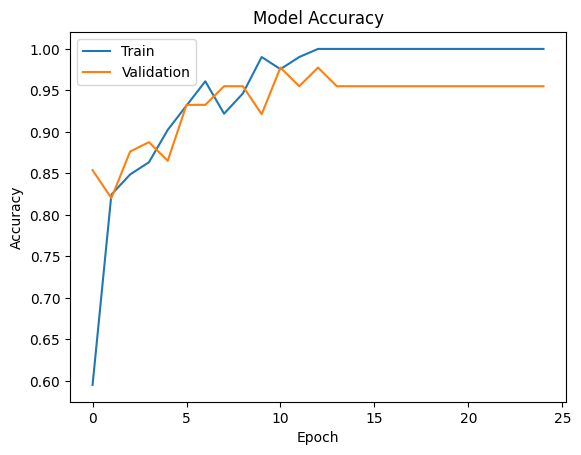

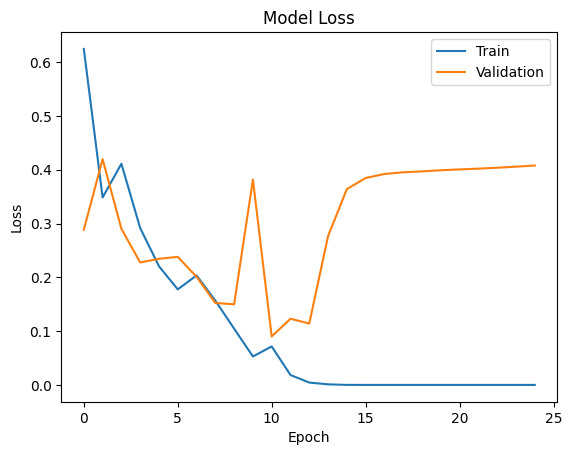

In [27]:
#generate accuracy and loss curve

import matplotlib.pyplot as plt
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#Calculation of metrics

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, cohen_kappa_score

# Predict on the test set
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
kappa = cohen_kappa_score(y_test, y_pred_binary)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
specificity = tn / (tn + fp)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1)
print("Kappa Constant:", kappa)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Accuracy: 0.9550561797752809
Precision: 0.9791666666666666
Recall: 0.94
Specificity: 0.9743589743589743
F1 Score: 0.9591836734693877
Kappa Constant: 0.9092299847016828


#ROC curve

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


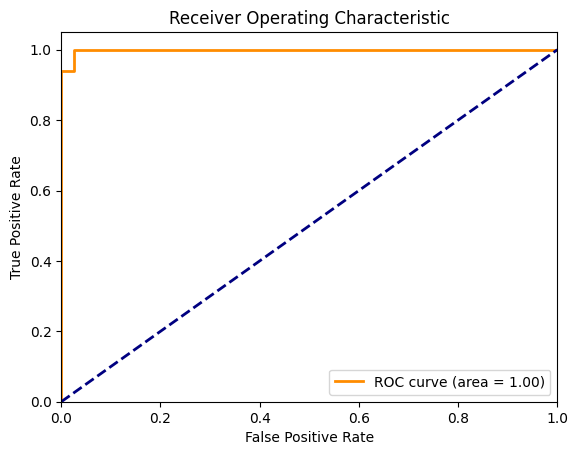

In [29]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = model.predict(X_test_reshaped)[:, 0]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **User Input**

In [30]:
feature_ranges = df.drop('class', axis=1).agg(['min', 'max'])

# Create input fields for each feature
feature_inputs = {}
for feature in df.columns[:-1]:
  min_val = feature_ranges.loc['min', feature]
  max_val = feature_ranges.loc['max', feature]
  feature_inputs[feature] = float(input(f"Enter value for {feature} (between {min_val} and {max_val}): "))

# Convert the inputs to DataFrame
user_input_df = pd.DataFrame([feature_inputs])

Enter value for MDVP:Fo(Hz) (between 88.333 and 260.105): 260.8930
Enter value for MDVP:Fhi(Hz) (between 102.145 and 592.03): 467.38
Enter value for MDVP:Flo(Hz) (between 65.476 and 239.17): 98.0835
Enter value for MDVP:Jitter(%) (between 0.00168 and 0.03316): 0.023467
Enter value for MDVP:Jitter(Abs) (between 7e-06 and 0.00026): 0.00016
Enter value for MDVP:RAP (between 0.00068 and 0.02144): 0.0015637
Enter value for MDVP:PPQ (between 0.00092 and 0.01958): 0.01873
Enter value for Jitter:DDP (between 0.00204 and 0.06433): 0.056743
Enter value for MDVP:Shimmer (between 0.00954 and 0.11908): 0.09043
Enter value for MDVP:Shimmer(dB) (between 0.085 and 1.302): 0.9832
Enter value for Shimmer:APQ3 (between 0.00455 and 0.05647): 0.04321
Enter value for Shimmer:APQ5 (between 0.0057 and 0.0794): 0.064321
Enter value for MDVP:APQ (between 0.00719 and 0.13778): 0.00619
Enter value for Shimmer:DDA (between 0.01364 and 0.16942): 0.014985
Enter value for NHR (between 0.00065 and 0.31482): 0.24563
En

In [31]:
# Normalize the user input
user_input_normalized = scaler.transform(user_input_df)

# Convert the normalized array back to a DataFrame
user_input_df_normalized = pd.DataFrame(user_input_normalized, columns=user_input_df.columns)

In [32]:
#find the class label for the normalized input using 1d-alexnet

# Reshape the user input for the 1D ALEXNET
user_input_reshaped = user_input_df_normalized.values.reshape(user_input_df_normalized.shape[0], user_input_df_normalized.shape[1], 1)

# Predict the class label
predicted_probability = model.predict(user_input_reshaped)[0][0]

# Convert probability to class label (0 or 1)
predicted_class = 1 if predicted_probability > 0.5 else 0

print("Predicted Class Label:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Predicted Class Label: 1
